# Practical 2: Deterministic Dynamic Programming

Author: CAMERON STROUD

Student Number: n11552123

### Learning Outcomes:
In this practical you will address the following learning outcomes:
- Control Sequences
- Cost Functions
- Deterministic Dynamic Programming

We will require the following library for this practical (Import all necessary libraries before running the code):

In [2]:
import numpy as np

## Part A: Deterministic Shortest Path
The Shortest Path Problem (SPP) involves finding the shortest path between two specific nodes in a weighted graph. In a graph, nodes represent points or locations, and edges represent connections between those points. A weighted graph includes numerical values associated with each edge, indicating the "cost" or "weight" of traveling between the connected nodes. The goal of the shortest path problem is to determine the path from a starting node to a target node that has the minimum total cost among all possible paths. The cost of a path is the sum of the costs of the edges along that path. Consider the following example:

Tom, who resides in City "A", is planning a journey towards City "H". Given his limited funds, he has devised a strategic plan to spend each night during his expedition at the abode of a friend. Tom has friends in cities "B", "C", "D", "E", "F", and "G".

Tom is mindful of optimizing his energy expenditure, and he is aware of the limited distances he can cover each day. On the first day of travel, he can comfortably reach City "B", "C", or "D". On the second day, he can reach City "E", "F", or "G". Ultimately, Tom can reach his destination, City "H", on the third day.

To conserve energy and navigate his journey efficiently, Tom must strategically decide where to spend each night along the route. It's imperative for him to consider the energy requirements between cities, which are outlined in the subsequent table. By skillfully selecting his overnight stops, Tom can ensure his expedition is both cost-effective and successful.

| Cities | A | B | C | D | E | F | G | H |
|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|
| **A** | / | 333 | 282 | 230 | / | / | / | / |
| **B** | / | / | / | / | 553 | 280 | 370 | / |
| **C** | / | / | / | / | 470 | 404 | 522 | / |
| **D** | / | / | / | / | 268 | 606 | 767 | / |
| **E** | / | / | / | / | / | / | / | 807 |
| **F** | / | / | / | / | / | / | / | 450 |
| **G** | / | / | / | / | / | / | / | 603 |

The left-hand side of the table indicates the departure cities, while the top denotes the arrival cities. For instance, the value "333" in the first row quantifies the energy from City "A" to City "B". Consider the following questions:

### Q1:
__Based on the above description and the energy table, construct a graphical representation of the shortest path problem involving the travel between cities. (Feel free to utilize any drawing tools at your disposal: e.g., PowerPoint, a hand-drawn illustration, etc.)__

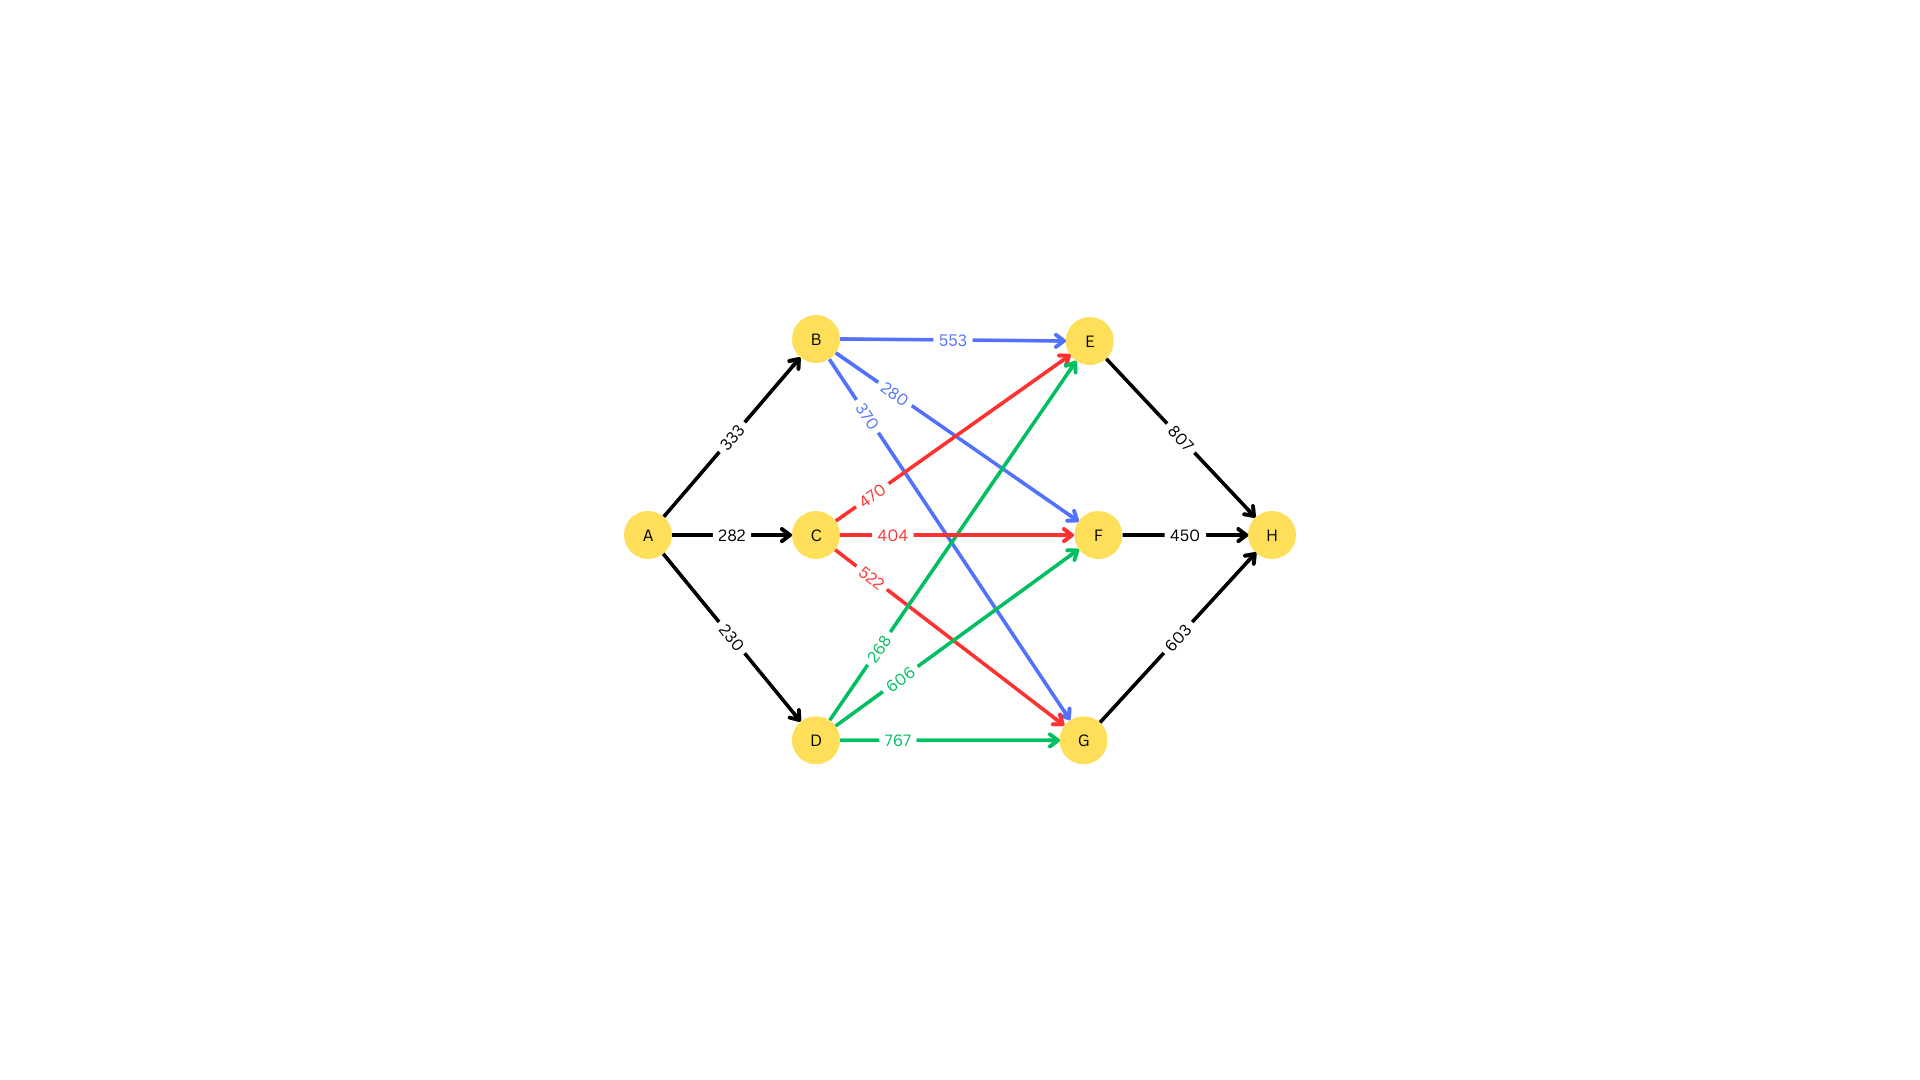

### Q2
__Inspect your graph, by inspection, identify the path with the least energy expenditure towards the destination.__

A-B-F-H: 1063

### Q3
__For all possible paths, calculate their costs by hand using the "cost-to-go" functions. (Hint: use your graph)__

A-B-E-H: 1693
A-B-F-H: 1063
A-B-G-H: 1306

A-C-E-H: 1559
A-C-F-H: 1136
A-C-G-H: 1407

A-D-E-H: 1305
A-D-F-H: 1286
A-D-G-H: 1600

### Q4
__Examine all potential paths with "cost-to-go" functions in Q3, identify the path characterized by the lowest energy consumption. Does this align with your intuition in Q2? Provide an explanation for the outcome.__

A-B-F-H has the lowest at 1063, this does align with the response to Q2. Q2 was discerned by working backwards from the goal following the lowest cost route.

### Q5
__Use the dynamic programming (DP) algorithm to identify the best (optimal) path exhibiting the minimum energy. Does this align with the path from Q4?__

J(H) = 0  
J(E) = 807  
J(F) = 450  
J(G) = 603  
J(B) = min{553 + J(E), 280 + J(F), 370 + J(G)} = min{1360, 730, 973} => If at B, go to F  
J(C) = min{470 + J(E), 404 + J(F), 522 + J(G)} = min{1277, 854, 1125} => If at C, go to F  
J(D) = min{268 + J(E), 606 + J(F), 767 + J(G)} = min{1074, 1056, 1370} => If at D, go to F  
J(A) = min{333 + J(B), 282 + J(C), 230 + J(D)} = min{1063, 1136, 1286} => If at A, go to B  


### Q6
__Complete the following code to implement deterministic dynamic programming algorithm for the SSP. We have provided some setup code.__

In [2]:
# Define the nodes at each step. Here, the nodes are defined by a dictionary. The keys in this dictionary "0~3" represent the 
# stage, and the values "0~7" represent City "A"~"H", respectively.
nodes = {
    0: [0],
    1: [1,2,3],
    2: [4,5,6],
    3: [7],
}

# Define the actions and the corresponding costs between the nodes. The keys in this dictionary "0~7" represent City "A"~"H", 
# and the values corresponding to each key represent the next city and the energy cost between these two cities, respectively.
graph = {
    0: [(1,333), (2,282), (3,230)],
    1: [(4,553), (5,280), (6,370)],
    2: [(4,470), (5,404), (6,522)],
    3: [(4,268), (5,606), (6,767)],
    4: [(7,807)],
    5: [(7,450)],
    6: [(7,603)],
    7: [],
}

In [10]:
num_stage = len(nodes)  # The number of stages
num_nodes = len(graph)  # The number of nodes
value_function = np.zeros(num_nodes)  # Initialize the value function for each node
value_function[num_nodes-1] = 0
optimal_action = np.zeros(num_nodes)  # Initialize the optimal action at each node
optimal_action[num_nodes-1] = num_nodes-1
optimal_path_index = nodes[0]  # Initialize the optimal path with the starting point

cities = ["A", "B", "C", "D", "E", "F", "G", "H"]  # The city nodes

def get_cost(graph_node):
    '''
    Param:
        graph_node: Tuple <node index, transition cost>
    '''
    if graph_node[0] == (num_nodes - 1):
        return graph_node[1]
    else:
        return graph_node[1] + get_cost(optimal_action[graph_node[0]])

# Implement deterministic dynamical programming algorithm
for k in range(num_stage-2, -1, -1):
    for n in nodes[k]:
        values = []
        num_action = len(graph[n])
        
        # Hint: compute the value for each action, and append to the values list
        ### START CODE HERE ###
        for i in range (num_action):
            node = graph[n][i][0]
            cost = graph[n][i][1]
            values.append(cost + value_function[node])
        
        ###  END CODE HERE ###
        
        value_function[n] = np.min(values)  # Choose the minimum value
        optimal_action[n] = graph[n][np.argmin(values)][0]  # Extract the action with minimum value

# Obtain the optimal path
optimal_path = ["A"]
for k in range(1, num_stage):
    action = optimal_action[int(optimal_path_index[-1])]
    optimal_path_index.append(int(action))
    optimal_path.append(cities[int(action)])
    
# Print the results
print('Optimal Cost:', value_function[0])
print('Optimal Path:', optimal_path)

Optimal Cost: 1063.0
Optimal Path: ['A', 'B', 'F', 'H']


### Q7
__Compare the result of your DP implementation to the by-hand computation in Q4 and Q5.__

The DP implementation has achieved the same result as the hand-computation in Q4 and Q5: A-B-F-H with total cost 1063

## Part B: Traveling Salesperson
In the Traveling Salesperson Problem (TSP), a salesperson is tasked with visiting a set of cities exactly once and returning to the starting city, while minimizing the total distance or cost traveled. The goal is to find the shortest possible route that visits all cities and returns to the starting point. Different from the above SSP, all cities are accessible in TSP.

Consider the following example: There are four cities "A", "B", "C", "D". The salesperson travels from City "A", and wishes to find a minimum cost (distance) that visits each of the cities once and return to City "A".

### Q8
__Consider the following given costs (travel distances), intuit the best control sequence. Explain why you chose this sequence.__

| Cities | A | B | C | D | 
|:---------:|:---------:|:---------:|:---------:|:---------:|
| **A** | 0 | 5 | 1 | 15 | 
| **B** | 5 | 0 | 20 | 4 | 
| **C** | 1 | 20 | 0 | 3 |
| **D** | 15 | 4 | 3 | 0 | 

Inuitively, it seems that A-C-D-B-A is the best route. This was selected by following the lowest cost route at each step, with the final transition just being back to A to fit the constraint.

### Q9
__For all possible control sequences, calculate their costs by hand using the "cost-to-go" functions of all constituent cities.__

A-B-C-D-A: 43  
A-B-D-C-A: 13  
A-C-B-D-A: 40  
A-C-D-B-A: 13  
A-D-B-C-A: 40  
A-D-C-B-A: 43  

### Q10
__Consider all possible sequences from Q9, identify the best (optimal) control sequence. Is this the control sequence that you expect? Explain why.__

A-C-D-B-A is indeed the best control sequence, but it ties with A-B-D-C-A.  As we need to visit each city once, and we start and end in the same spot, there will be some symmetry due to the costs being equal in each direction (eg. A to B is the same as B to A). Thus, the same heuristic applied in the DP algorithm of minimisnig cost while working backwards from the goal would result in an identical result to minimising cost while working forwards towards the goal.

### Q11
__Use the dynamic programming algorithm to identify the best (optimal) control sequence.__

Note: working backwards from the end goal, A, but the cost 'variables' denote the order of travel. A is not an option as cities can only be visited once.


J(Af) = 0  

Third city:  
J(BA) = 5, go to A  
J(CA) = 1, go to A  
J(DA) = 15, go to A  

Second city:  
J(BCA) = min{20 + J(CA)} = 4, if previous city was D, at B, go to C  
J(CBA) = min{20 + J(BA)} = 25, if previous city was D, at C, go to B  
J(BDA) = min{4 + J(DA)} = 20, if previous city was C, at B, go to D  
J(DBA) = min{4 + J(BA)} = 9, if previous city was C, at B, go to B  
J(CDA) = min{3 + J(DA)} = 18, if previous city was B, at C, go to D  
J(DCA) = min{3 + J(CA)} = 4, if previous city was B, at D, go to C  

First city:  
J(AB) = min{20 + J(CDA), 4 + J(DCA)} = min{38, 8} => 8, if at B, go to C  
J(AC) = min{20 + J(BDA), 3 + J(DBA)} = min{40, 12} => 12, if at C, go to D  
J(AD) = min{4 + J(BCA), 3 + J(CBA)} = min{8, 28} => 8, if at D, go to B  


Start:  
J(A0) = min{5 + J(AB), 1 + J(AC), 15 + J(AD)} = min{13, 13, 23} => 8, if at A, go to either C or B  


### Q12
__Compare the control sequence from the "cost-to-go" functions (Q10) and dynamic programming algorithm (Q11). Are these sequences identical? Does this outcome align with your initial expectations?__

The control sequences in the DP algorithm and 'cost-to-go' are the same, and in-line with initial expectations.

### Q13
__In the above, we started and finished in city A. How would the optimal control sequence change if we were to start and finish in a different city?__

All of the sequences would change, swapping out 'A' for the different start/end city and vice versa. This means that not only would the start and end transitions change, but the interim steps would have different costs due to the different distributions of transition costs (e.g., the relation of transitions A-B/C/D is different from B-A/C/D, where A-C is preferred, but B-C incurs the highest cost).

### Q14
__In the above, we considered a problem with 4 states (cities). How would you handle a higher order problem (e.g. with 20 cities)?__

The number of states increases exponentially with the inclusion of more cities. In high order problems, this can be computationally expensive, having to calculate the cost at every state to create the optimal action 'map'. An alternative search method, such as A* with an appropriate heuristic, can limit the search.

### Q15
__Given the costs in Q8, complete the following code to implement the deterministic dynamic programming algorithm for the TSP starting from City "A".__

In [3]:
cityCosts = np.array([
  [float('inf'), 5, 1, 15],
  [5, float('inf'), 20, 4],
  [1, 20, float('inf'), 3],
  [15, 4, 3, float('inf')]  
])

In [18]:
# Create Dynamic Programming function 
# Hint: use 'def func_name(inputs): ... return outputs'
### START CODE HERE ###
def DeterministicDP(runningCost, tempCost, ActionSet):
    costs = [runningCost + tempCost[i] for i, action in  enumerate(ActionSet)]
    newCost = min(costs)
    newAction = ActionSet[costs.index(newCost)]
    return newCost, newAction
### END CODE HERE ###

In [19]:
numCity = 4 # set number of cities
Path = ['A'] # initialize terminal state in the path
Cost = [0] # initialize terminal cost
runningCost = 0 # intiailize terminal running cost
# Create Action Set
ActionSet = []
for ii in range(numCity):
    ActionSet += chr(ord('A')+ii)
print(ActionSet)
# Establish Terminal State City
currentCity = 'A'

# while we have not visited all cities
while len(Path) <= numCity:
    # extract the cost to travel from where we are
    tempCost = np.array(cityCosts[:,ActionSet.index(currentCity)])
    if len(Path) < numCity:
        # if we haven't visited all cities
        for ii in Path:
            # set the cost for any city we have been to to infinite
            tempCost[ActionSet.index(ii)] = float('inf')
    else:
        # after we have visited all cities
        for ii in Path[:-1]:
            # set every city except the last to have infinite cost
            tempCost[ActionSet.index(ii)] = float('inf')
    
    # operate DP function
    newCost, newAction = DeterministicDP(0, tempCost, ActionSet)
    Path.insert(0,newAction) # add action to the START of the path
    Cost.insert(0,newCost) # add the cost
    runningCost += newCost # add to running cost
    currentCity = newAction # update location

print('City Set:', ActionSet)
print('Travel Costs:\n', cityCosts)
print('Final Cost:', runningCost)
print('Cost:', Cost)
print('Path:', Path)

['A', 'B', 'C', 'D']
City Set: ['A', 'B', 'C', 'D']
Travel Costs:
 [[inf  5.  1. 15.]
 [ 5. inf 20.  4.]
 [ 1. 20. inf  3.]
 [15.  4.  3. inf]]
Final Cost: 13.0
Cost: [5.0, 4.0, 3.0, 1.0, 0]
Path: ['A', 'B', 'D', 'C', 'A']


## Part C: Discussion

### Q16
__Discuss the issues you have encountered when using the deterministic dynamic programming algorithm.__

* With large state spaces, there is a lot of computation required to calculate all the costs
* Without sufficient constraints, the algorithm can run itself into circles, such as in the case of being able to repeat city visits in the above example

### Q17
__Consider the TSP problem and assume that the salesperson needs to do a round-trip (covering all cities starting and ending in City "A" every day). Unfortunately, the travelling cost between cities is random, and the salesperson does not known values in advance. Suggest a procedure that will assist the salesperson to optimize their route choices over time.__

Without knowing values in advance, and the problem being random, one can apply dynamic programming for stochastic systems. This shifts the focus towards optimising control policies, instead of sequences. One could assume a cost distribution for each action, and update probabilities overtime as they are realised in order to improve the model.